In [19]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import pandas as pd

# I. Implement logistic regression algorithm from scratch. 
- You can use Gradient Descent orNewton Raphson as optimization method for loss function. Note that your implementation should follow an OOP form.
1. Gradient Descent Method

In [20]:
import numpy as np

class LogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=100000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None

    def _sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        # Initialize parameters
        num_samples, num_features = X.shape
        self.weights = np.zeros(num_features)
        self.bias = 0

        # Gradient Descent
        for _ in range(self.num_iterations):
            # Make prediction
            linear_model = np.dot(X, self.weights) + self.bias
            predictions = self._sigmoid(linear_model)

            # Compute gradients
            dw = (1 / num_samples) * np.dot(X.T, (predictions - y))
            db = (1 / num_samples) * np.sum(predictions - y)

            # Update parameters
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        predictions = self._sigmoid(linear_model)
        prediction_class = [1 if i >= 0.5 else 0 for i in predictions]
        return prediction_class
    
    def compute_loss(self, y_true, y_pred):
        y_true = np.array(y_true)
        y_pred = np.array(y_pred)
        m = len(y_true)
        epsilon = 1e-15
        y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
        loss = -1/m * np.sum(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
        return (f'Cross-entropy loss : {loss}')

    def accuracy(self, y_true, y_pred):
        y_true = np.array(y_true)
        y_pred = np.array(y_pred)
        m = len(y_true)
        accuracy = (np.sum(y_pred == y_true) / m) * 100
        return (f'Accuray : {accuracy}%')

In [21]:
train = pd.read_csv('ds1_train.csv')
train

,x_1,x_2,y
0,2.911809,60.359613,0.0
1,3.774746,344.149284,0.0
2,2.615488,178.222087,0.0
3,2.013694,15.259472,0.0
4,2.757625,66.194174,0.0
...,...,...,...
795,3.724697,23.219963,1.0
796,3.139055,5.970538,1.0
797,2.969095,20.249978,1.0
798,3.957531,27.261970,1.0


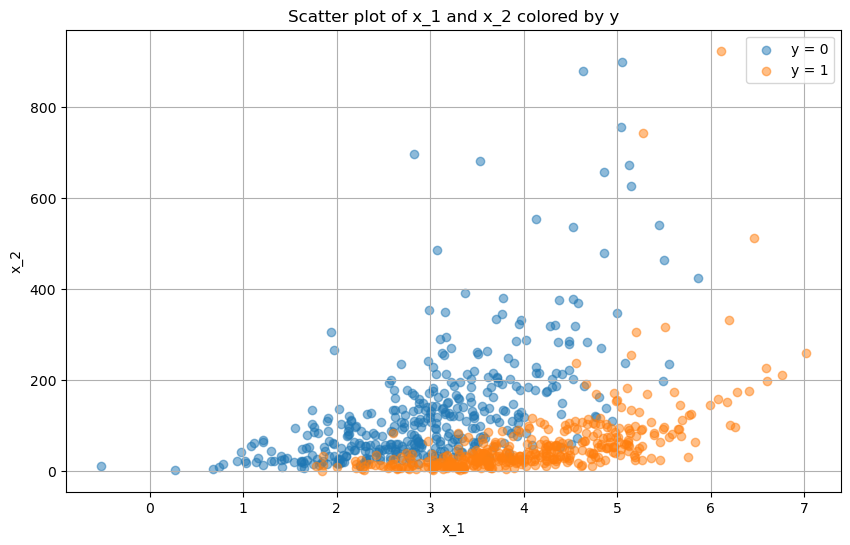

In [22]:
# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(train[train['y'] == 0]['x_1'], train[train['y'] == 0]['x_2'], label='y = 0', alpha=0.5)
plt.scatter(train[train['y'] == 1]['x_1'], train[train['y'] == 1]['x_2'], label='y = 1', alpha=0.5)
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.title('Scatter plot of x_1 and x_2 colored by y')
plt.legend()
plt.grid(True)
plt.show()


In [23]:
X_train = train.iloc[:, :-1].values
y_train = train.iloc[:, -1].values

# Create and train the model
model = LogisticRegression()
model.fit(X_train, y_train)


In [24]:
#Loading the test dataset 
test = pd.read_csv('ds1_valid.csv')
X_test = test[['x_1', 'x_2']].values
y_test = test['y'].values

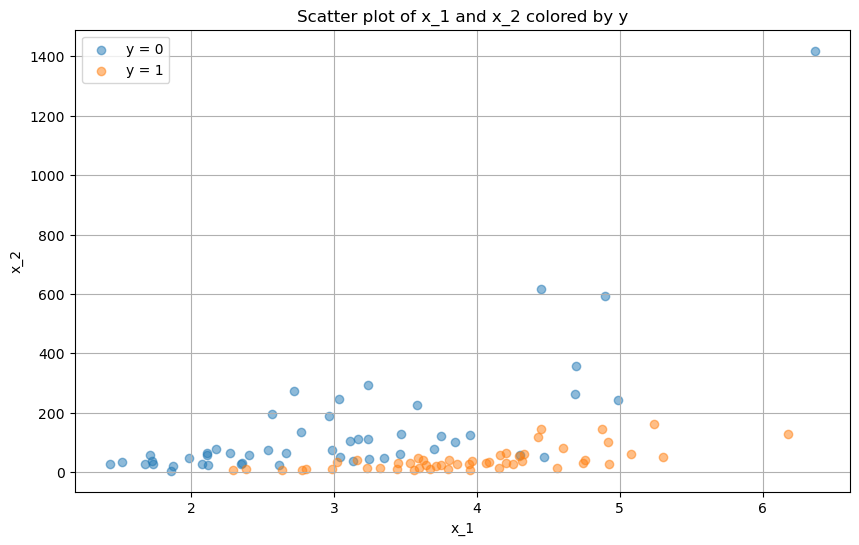

In [25]:
plt.figure(figsize=(10, 6))
plt.scatter(test[test['y'] == 0]['x_1'], test[test['y'] == 0]['x_2'], label='y = 0', alpha=0.5)
plt.scatter(test[test['y'] == 1]['x_1'], test[test['y'] == 1]['x_2'], label='y = 1', alpha=0.5)
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.title('Scatter plot of x_1 and x_2 colored by y')
plt.legend()
plt.grid(True)
plt.show()


In [26]:
y_pred = model.predict(X_test)

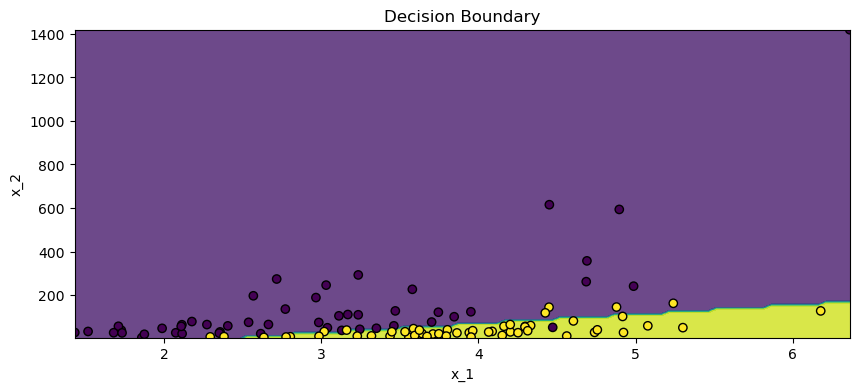

In [27]:
xx, yy = np.meshgrid(np.linspace(X_test[:, 0].min(), X_test[:, 0].max(), 100),
                     np.linspace(X_test[:, 1].min(), X_test[:, 1].max(), 100))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = np.array(Z).reshape(xx.shape)  # Convert the list to a NumPy array before reshaping

plt.figure(figsize=(10, 4))
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors='k')
plt.title('Decision Boundary')
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.show()


In [28]:
model.compute_loss(y_test, y_pred)

'Cross-entropy loss : 3.453893631439673'

In [29]:
model.accuracy(y_test,y_pred)

'Accuray : 90.0%'

2. Newton-Raphson Method

In [30]:
import numpy as np

class LogisticRegressionNewton:
    def __init__(self, max_iter=10, tol=1e-6):
        self.max_iter = max_iter
        self.tol = tol
        self.theta = None

    @staticmethod
    def sigmoid(z):
        return 1 / (1 + np.exp(-z))

    def compute_cost(self, X, y):
        m = len(y)
        h = self.sigmoid(X @ self.theta)
        epsilon = 1e-5
        cost = -1/m * np.sum(y * np.log(h + epsilon) + (1 - y) * np.log(1 - h + epsilon))
        return cost

    def compute_gradient(self, X, y):
        m = len(y)
        h = self.sigmoid(X @ self.theta)
        gradient = 1/m * X.T @ (h - y)
        return gradient

    def compute_hessian(self, X):
        m = X.shape[0]
        h = self.sigmoid(X @ self.theta)
        diag_weights = np.diag(h * (1 - h))
        hessian = 1/m * X.T @ diag_weights @ X
        return hessian

    def fit(self, X, y):
        # Add a bias term to the data
        X = np.hstack([np.ones((X.shape[0], 1)), X])
        
        # Initialize theta if it has not been initialized
        if self.theta is None:
            self.theta = np.zeros(X.shape[1])

        for i in range(self.max_iter):
            gradient = self.compute_gradient(X, y)
            hessian = self.compute_hessian(X)
            
            # Update the theta values using the Newton-Raphson method
            self.theta = self.theta - np.linalg.inv(hessian) @ gradient

            # Check for convergence
            if np.linalg.norm(gradient) < self.tol:
                break

    def predict_prob(self, X):
        # Add a bias term to the data
        X = np.hstack([np.ones((X.shape[0], 1)), X])
        return self.sigmoid(X @ self.theta)

    def predict(self, X, threshold=0.5):
        return (self.predict_prob(X) >= threshold).astype(int)
    
# Prepare the data
X_train_N = train[['x_1', 'x_2']].values
y_train_N = train['y'].values

# Initialize and train the model
model = LogisticRegressionNewton()
model.fit(X_train, y_train)


In [31]:
y_pred = model.predict(X_test)

# Compute the accuracy
accuracy = np.mean(y_pred == y_test)
accuracy

0.9

In [32]:
#Loading the test dataset 
test = pd.read_csv('ds1_valid.csv')
X_test = test[['x_1', 'x_2']].values
y_test = test['y'].values

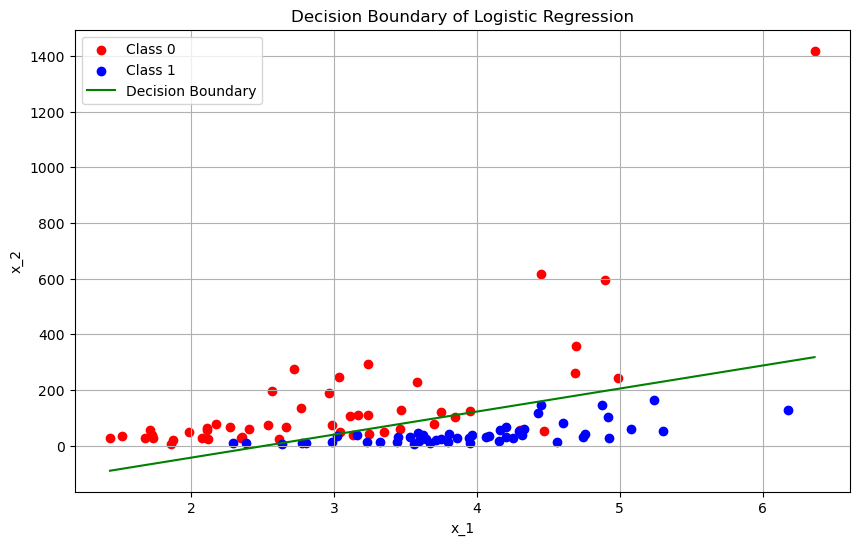

In [33]:
import matplotlib.pyplot as plt

# Calculate decision boundary
x1_values = np.linspace(X_test[:, 0].min(), X_test[:, 0].max(), 100)
x2_values = -(model.theta[0] + model.theta[1] * x1_values) / model.theta[2]

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(X_test[y_test == 0][:, 0], X_test[y_test == 0][:, 1], color='red', label='Class 0')
plt.scatter(X_test[y_test == 1][:, 0], X_test[y_test == 1][:, 1], color='blue', label='Class 1')
plt.plot(x1_values, x2_values, color='green', label='Decision Boundary')
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.legend()
plt.title('Decision Boundary of Logistic Regression')
plt.grid(True)
plt.show()
